# Распознавание объектов на изображениях из набора данных CIFAR-10

In [36]:
import numpy as np
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import os

In [2]:
# Названия классов из набора данных CIFAR-10
classes=['самолет', 'автомобиль', 'птица', 'кот', 'олень', 'собака', 'лягушка', 'лошадь', 'корабль', 'грузовик']

## Подготовка данных

**Загружаем данные**

In [3]:
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

**Просмотр примеров данных**

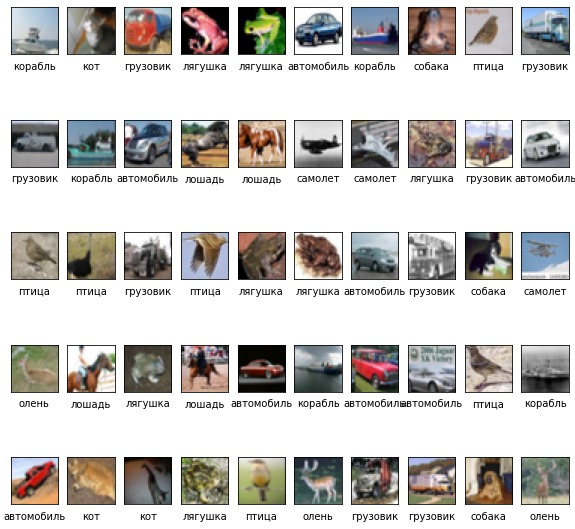

In [4]:
plt.figure(figsize=(10,10))
for i in range(100,150):
    plt.subplot(5,10,i-100+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])
    plt.xlabel(classes[Y_train[i][0]])

**Нормализуем данные**

In [5]:
x_train = X_train / 255
x_test = X_test / 255

**Преобразуем правильные ответы в формат one hot encoding**

In [6]:
y_train = utils.to_categorical(Y_train, 10)
y_test = utils.to_categorical(Y_test, 10)

## Создаем нейронную сеть

In [7]:
# Создаем последовательную модель
model = Sequential()
# Первый сверточный слой
model.add(Conv2D(32, (3, 3), padding='same',
                        input_shape=(32, 32, 3), activation='relu'))
# Второй сверточный слой
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
# Первый слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
# Слой регуляризации Dropout
model.add(Dropout(0.25))

# Третий сверточный слой
model.add(Conv2D(64, (3, 3), activation='relu'))
# Четвертый сверточный слой
model.add(Conv2D(64, (3, 3), activation='relu'))
# Второй слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
# Слой регуляризации Dropout
model.add(Dropout(0.25))

# Слой преобразования данных из 2D представления в плоское
model.add(Flatten())
# Полносвязный слой для классификации
model.add(Dense(512, activation='relu'))
# Слой регуляризации Dropout
model.add(Dropout(0.5))
# Выходной полносвязный слой
model.add(Dense(10, activation='softmax'))

**Печатаем информацию о сети**

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 12, 12, 64)        36928     
                                                        

**Компилируем модель**

In [9]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

## Обучаем нейронную сеть

In [10]:
history = model.fit(x_train, y_train,
              batch_size=128,
              epochs=25,
              validation_split=0.1,
              verbose=2)

Epoch 1/25
352/352 - 65s - loss: 1.6177 - accuracy: 0.4036 - val_loss: 1.3488 - val_accuracy: 0.5216 - 65s/epoch - 185ms/step
Epoch 2/25
352/352 - 65s - loss: 1.2262 - accuracy: 0.5632 - val_loss: 1.0104 - val_accuracy: 0.6414 - 65s/epoch - 184ms/step
Epoch 3/25
352/352 - 65s - loss: 1.0268 - accuracy: 0.6374 - val_loss: 0.9154 - val_accuracy: 0.6772 - 65s/epoch - 184ms/step
Epoch 4/25
352/352 - 68s - loss: 0.9119 - accuracy: 0.6806 - val_loss: 0.7894 - val_accuracy: 0.7252 - 68s/epoch - 192ms/step
Epoch 5/25
352/352 - 67s - loss: 0.8304 - accuracy: 0.7104 - val_loss: 0.7234 - val_accuracy: 0.7478 - 67s/epoch - 190ms/step
Epoch 6/25
352/352 - 67s - loss: 0.7701 - accuracy: 0.7287 - val_loss: 0.6924 - val_accuracy: 0.7558 - 67s/epoch - 189ms/step
Epoch 7/25
352/352 - 67s - loss: 0.7156 - accuracy: 0.7485 - val_loss: 0.6457 - val_accuracy: 0.7814 - 67s/epoch - 189ms/step
Epoch 8/25
352/352 - 64s - loss: 0.6683 - accuracy: 0.7648 - val_loss: 0.6808 - val_accuracy: 0.7676 - 64s/epoch - 182

## Оцениваем качетсво обучения сети

In [11]:
# Оцениваем качество обучения модели на тестовых данных
scores = model.evaluate(x_test, y_test, verbose=1)


313/313 [==============================] - 4s 12ms/step - loss: 0.6529 - accuracy: 0.7960


In [12]:
print("Доля верных ответов на тестовых данных, в процентах:", round(scores[1] * 100, 4))

Доля верных ответов на тестовых данных, в процентах: 79.6


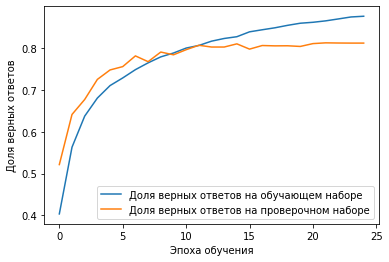

In [13]:
plt.plot(history.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'],
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

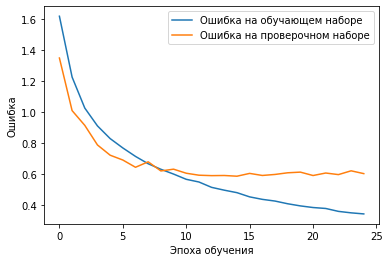

In [14]:
plt.plot(history.history['loss'],
         label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'],
         label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

## Сохраняем обученную нейронную сеть

In [15]:
model.save("cifar10_model.h5")

g:\Python\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Сохраняем модель на локальный компьютер

## Применяем сеть для распознавания объектов на изображениях

**Просмотр изображения из набора данных для тестирования**

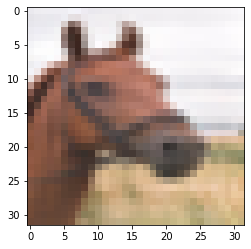

In [16]:
index=99
plt.imshow(X_test[index])
plt.show()

**Преобразование тестового изображения**

In [17]:
x = x_test[index]
x = np.expand_dims(x, axis=0)

**Запуск распознавания**

In [18]:
prediction = model.predict(x)

1/1 [==============================] - 0s 137ms/step


**Печатаем результаты распознавания**

In [19]:
print(prediction)

[[2.5413991e-03 3.2517160e-06 7.5762182e-02 1.9546786e-01 7.5747021e-02
  1.2176004e-01 1.1213115e-02 5.1722121e-01 1.2117517e-04 1.6284082e-04]]


**Преобразуем результаты из формата one hot encoding**

In [20]:
prediction = np.argmax(prediction)
print(classes[prediction])

лошадь


**Печатаем правильный ответ**

In [21]:
print(classes[Y_test[index][0]])

лошадь


## Распознаем дополнительные изображение

**Смотрим загруженную картинку**

In [38]:
os.listdir('data')

['cat.jpg', 'horse.jpg', 'plane.jpg', 'ship.jpg']

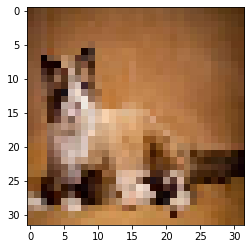

1/1 [==============================] - 0s 27ms/step
кот


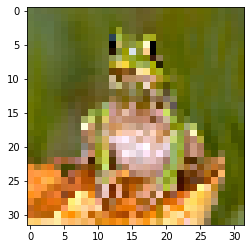

1/1 [==============================] - 0s 24ms/step
лягушка


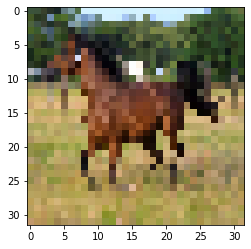

1/1 [==============================] - 0s 28ms/step
лошадь


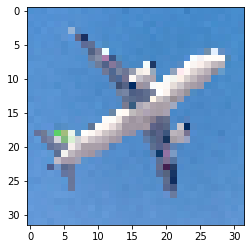

1/1 [==============================] - 0s 24ms/step
самолет


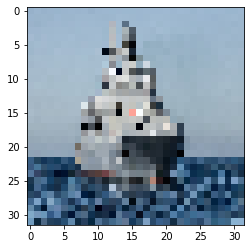

1/1 [==============================] - 0s 23ms/step
корабль


In [42]:
images = ['data/'+img for img in os.listdir('data')]
for img_path in images:
    img = image.load_img(img_path, target_size=(32, 32))
    plt.imshow(img)
    plt.show()
    x = image.img_to_array(img)
    x /= 255
    x = np.expand_dims(x, axis=0)
    prediction = model.predict(x)
    prediction = np.argmax(prediction)
    print(classes[prediction])
